In [1]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

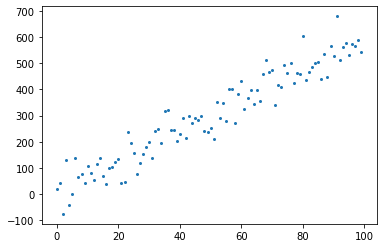

In [2]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

In [3]:
%matplotlib notebook 
plt.rcParams['animation.html'] = 'jshtml'

<IPython.core.display.Javascript object>


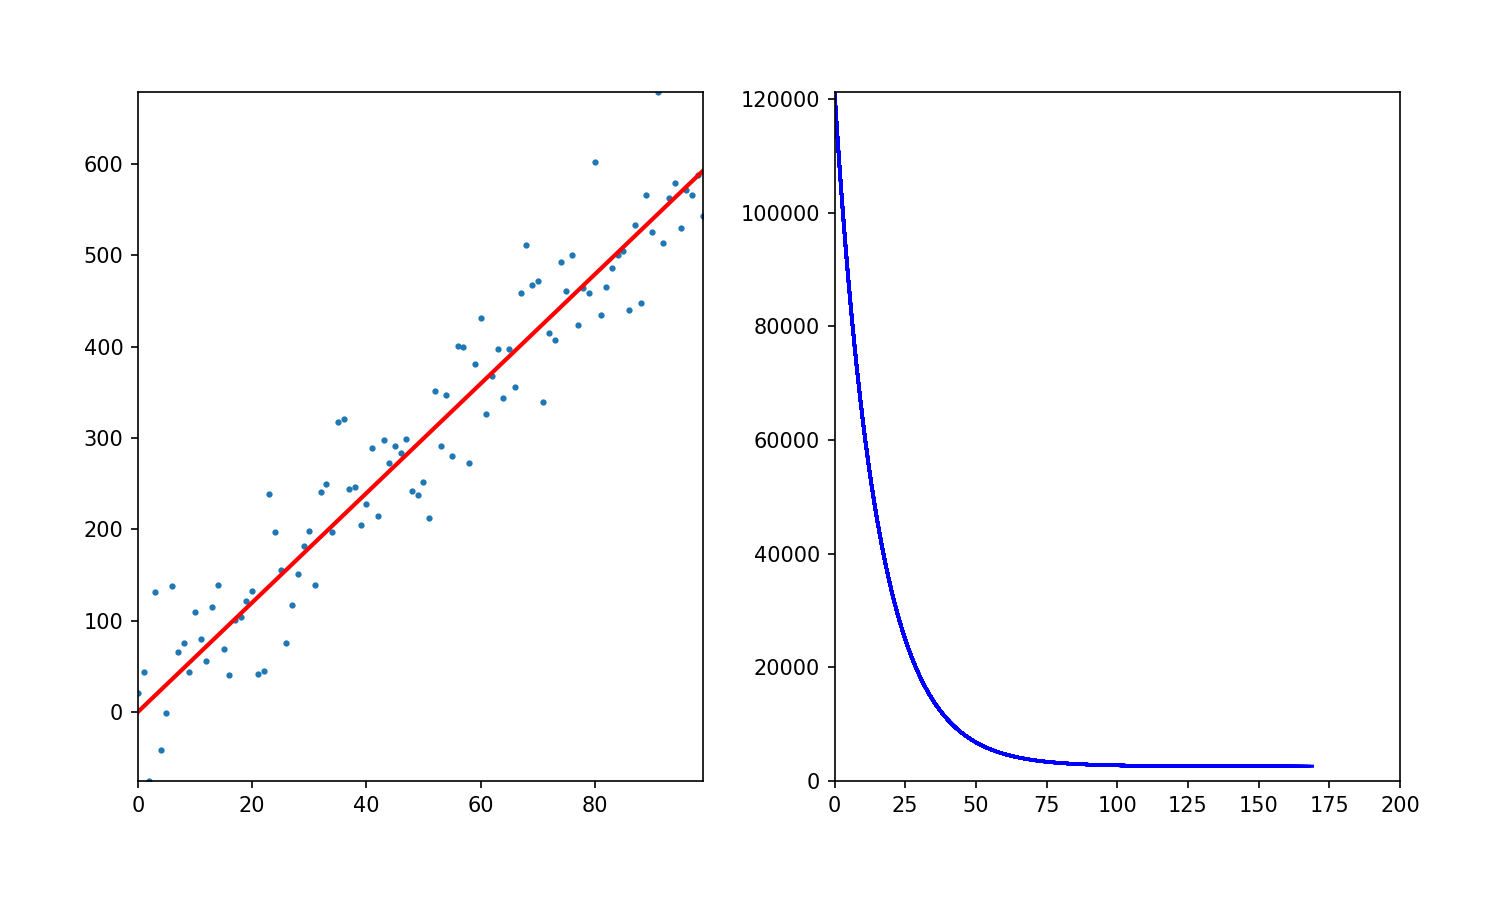

<ipython-input-4-834dc8aadb6e>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(1, 2, 2)


In [4]:
###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)


In [5]:
b_current = 0 
m_current = 0

learningRate = 0.00001
num_iteration = 200

precision = 0.1


previous_step_size = 1 

n = len(y)
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * np.sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    
    if(i % 10 ==0):
        # print("Gradients: ", m_gradient, " , ", b_gradient)
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 100
Iteration No.= 0  m =  0.19742474722910344  b= 0.0030018951516426525  Cost= 121312.96645057516
Iteration No.= 10  m =  1.8479874289121327  b= 0.02814079583778642  Cost= 63479.53838600252
Iteration No.= 20  m =  3.0299502846003543  b= 0.04621482520012279  Cost= 33822.801926168584
Iteration No.= 30  m =  3.8763499386296063  b= 0.059229715470066814  Cost= 18614.95302969904
Iteration No.= 40  m =  4.482453595824245  b= 0.06862176664600725  Cost= 10816.43219586385
Iteration No.= 50  m =  4.916481871074006  b= 0.07541950968192024  Cost= 6817.383265953057
Iteration No.= 60  m =  5.227287381651691  b= 0.08035947310561518  Cost= 4766.687361686722
Iteration No.= 70  m =  5.449853368594634  b= 0.0839690832139805  Cost= 3715.098598777617
Iteration No.= 80  m =  5.609231246172866  b= 0.08662602870223401  Cost= 3175.8477267962026
Iteration No.= 90  m =  5.7233602715369445  b= 0.08860077153130547  Cost= 2899.321545321162
Iteration No.= 100  m =  5.805086703330988  b= 0.090086988857120

In [6]:
# We have Beta_0 Y-Intercept 
# We have Beta_1 Slope of the line
# We have to prepare our data in 2 Format
dimensions  = 2 
n = len(y)

ones = np.ones(n)
x_new = np.vstack((x, ones)).T

print(x_new)
print(y)

[[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [24.  1.]
 [25.  1.]
 [26.  1.]
 [27.  1.]
 [28.  1.]
 [29.  1.]
 [30.  1.]
 [31.  1.]
 [32.  1.]
 [33.  1.]
 [34.  1.]
 [35.  1.]
 [36.  1.]
 [37.  1.]
 [38.  1.]
 [39.  1.]
 [40.  1.]
 [41.  1.]
 [42.  1.]
 [43.  1.]
 [44.  1.]
 [45.  1.]
 [46.  1.]
 [47.  1.]
 [48.  1.]
 [49.  1.]
 [50.  1.]
 [51.  1.]
 [52.  1.]
 [53.  1.]
 [54.  1.]
 [55.  1.]
 [56.  1.]
 [57.  1.]
 [58.  1.]
 [59.  1.]
 [60.  1.]
 [61.  1.]
 [62.  1.]
 [63.  1.]
 [64.  1.]
 [65.  1.]
 [66.  1.]
 [67.  1.]
 [68.  1.]
 [69.  1.]
 [70.  1.]
 [71.  1.]
 [72.  1.]
 [73.  1.]
 [74.  1.]
 [75.  1.]
 [76.  1.]
 [77.  1.]
 [78.  1.]
 [79.  1.]
 [80.  1.]
 [81.  1.]
 [82.  1.]
 [83.  1.]
 [84.  1.]
 [85.  1.]
 [86.  1.]
 [87.  1.]
 [88.  1.]
 [89.  1.]
 [90.  1.]

In [7]:
x_new.shape

(100, 2)

In [8]:
x_new.T.shape

(2, 100)

In [9]:
oldCost = 0 

dimensions = 2 # Dimensions

learningRate = 0.00001
num_iteration = 200
precision = 0.1

# Our model paramters are two, we have y-intercept and slope of the line
beta_model_param = np.zeros(2)
beta_gradient = np.zeros(dimensions)

y_prediction = np.zeros(n)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = np.einsum("j,ji->i", beta_model_param, x_new.T )
  
    # Calculate gradients
    # x_new is of shape (100, 2)
    # (y - y_prediction) is of shape (100, )
    # beta_gradient will be of (2,)
    beta_gradient = (1.0/n)* np.einsum('i,ij->j',  (y_prediction - y), x_new)
        

    # The following sums will be a reduce
    # We compute costs just for monitoring 
    cost = (1/n)* np.sum( np.power((y_prediction - y ), 2))
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # print(i , "beta_model_param=", beta_model_param, " Cost=", cost)
    # update the weights - Regression Coefficients 
    beta_model_param = beta_model_param - learningRate * beta_gradient
    
    if(i % 10 ==0):
        print("Iteration No.=", i ," beta_model_param = ", beta_model_param, " Cost=", cost) 

print("beta_model_param = ", beta_model_param)

Iteration No.= 0  beta_model_param =  [0.19742475 0.0030019 ]  Cost= 121312.96645057516
Iteration No.= 10  beta_model_param =  [1.84798743 0.0281408 ]  Cost= 63479.53838600252
Iteration No.= 20  beta_model_param =  [3.02995028 0.04621483]  Cost= 33822.801926168584
Iteration No.= 30  beta_model_param =  [3.87634994 0.05922972]  Cost= 18614.95302969904
Iteration No.= 40  beta_model_param =  [4.4824536  0.06862177]  Cost= 10816.43219586386
Iteration No.= 50  beta_model_param =  [4.91648187 0.07541951]  Cost= 6817.383265953062
Iteration No.= 60  beta_model_param =  [5.22728738 0.08035947]  Cost= 4766.687361686728
Iteration No.= 70  beta_model_param =  [5.44985337 0.08396908]  Cost= 3715.09859877762
Iteration No.= 80  beta_model_param =  [5.60923125 0.08662603]  Cost= 3175.847726796206
Iteration No.= 90  beta_model_param =  [5.72336027 0.08860077]  Cost= 2899.321545321162
Iteration No.= 100  beta_model_param =  [5.8050867  0.09008699]  Cost= 2757.519467278425
Iteration No.= 110  beta_model_